In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.transform import resize
from skimage.io import imread
import random
from os import path
import cv2
import random

In [2]:
DATA_SET_PATH = "/Users/j/CAPSTONE-PROJECT/Car-Dataset/"
ANNOTATION_PATH = "Annotations/"
TRAIN_IMAGES_DIR_PATH = "Car-Images/Train/"
TEST_IMAGES_DIR_PATH = "Car-Images/Test/"

In [3]:
"""
DATA_SET_PATH = "/Users/j/CAPSTONE-PROJECT/Car-Dataset/"
ANNOTATION_PATH = DATA_SET_PATH + "Annotations/"
TRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car-Images/Train/"
TEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car-Images/Test/"
"""

'\nDATA_SET_PATH = "/Users/j/CAPSTONE-PROJECT/Car-Dataset/"\nANNOTATION_PATH = DATA_SET_PATH + "Annotations/"\nTRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car-Images/Train/"\nTEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car-Images/Test/"\n'

In [4]:
car_makes_df = pd.read_csv("/Users/j/CAPSTONE-PROJECT/Car-Dataset/Car-names.csv", header=None, names=["car_make"]) 

In [5]:
car_makes_df

car_make
0          AM General Hummer SUV 2000
1                 Acura RL Sedan 2012
2                 Acura TL Sedan 2012
3                Acura TL Type-S 2008
4                Acura TSX Sedan 2012
..                                ...
191  Volkswagen Beetle Hatchback 2012
192          Volvo C30 Hatchback 2012
193              Volvo 240 Sedan 1993
194               Volvo XC90 SUV 2007
195     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [6]:
car_makes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_make  196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [7]:
car_annotations_train = pd.read_csv("/Users/j/CAPSTONE-PROJECT/Car-Dataset/Annotations/Train Annotations.csv")
car_annotations_test = pd.read_csv("/Users/j/CAPSTONE-PROJECT/Car-Dataset/Annotations/Test Annotation.csv")

In [8]:
car_annotations_train

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0     00001.jpg                        39         116         569         375   
1     00002.jpg                        36         116         868         587   
2     00003.jpg                        85         109         601         381   
3     00004.jpg                       621         393        1484        1096   
4     00005.jpg                        14          36         133          99   
...         ...                       ...         ...         ...         ...   
8139  08140.jpg                         3          44         423         336   
8140  08141.jpg                       138         150         706         523   
8141  08142.jpg                        26         246         660         449   
8142  08143.jpg                        78         526        1489         908   
8143  08144.jpg                        20         240         862         677   

      Image class  
0              14  
1               3  
2              91  
3             134  
4             106  
...           ...  
8139           78  
8140          196  
8141          163  
8142          112  
8143           17  

[8144 rows x 6 columns]

In [9]:
car_annotations_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8144 non-null   object
 1   Bounding Box coordinates  8144 non-null   int64 
 2   Unnamed: 2                8144 non-null   int64 
 3   Unnamed: 3                8144 non-null   int64 
 4   Unnamed: 4                8144 non-null   int64 
 5   Image class               8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [10]:
car_annotations_test

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0     00001.jpg                        30          52         246         147   
1     00002.jpg                       100          19         576         203   
2     00003.jpg                        51         105         968         659   
3     00004.jpg                        67          84         581         407   
4     00005.jpg                       140         151         593         339   
...         ...                       ...         ...         ...         ...   
8036  08037.jpg                        49          57        1169         669   
8037  08038.jpg                        23          18         640         459   
8038  08039.jpg                        33          27         602         252   
8039  08040.jpg                        33         142         521         376   
8040  08041.jpg                        77          73         506         380   

      Image class  
0             181  
1             103  
2             145  
3             187  
4             185  
...           ...  
8036           63  
8037           16  
8038           17  
8039           38  
8040           32  

[8041 rows x 6 columns]

In [11]:
car_annotations_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8041 non-null   object
 1   Bounding Box coordinates  8041 non-null   int64 
 2   Unnamed: 2                8041 non-null   int64 
 3   Unnamed: 3                8041 non-null   int64 
 4   Unnamed: 4                8041 non-null   int64 
 5   Image class               8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


In [12]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(pd.DataFrame(car_annotations_train['Image class']).value_counts())

Image class
119            68
79             49
161            48
167            48
144            47
56             47
98             46
171            46
162            46
191            46
20             46
182            46
95             46
43             46
112            46
194            46
153            45
147            45
44             45
179            45
53             45
123            45
59             45
121            45
65             45
73             45
72             45
148            45
115            45
114            45
81             45
82             45
109            45
107            45
1              45
165            45
6              45
8              45
34             45
24             45
187            44
160            44
188            44
164            44
74             44
75             44
76             44
85             44
89             44
16             44
94             44
170            44
151            44
105            44
108            4

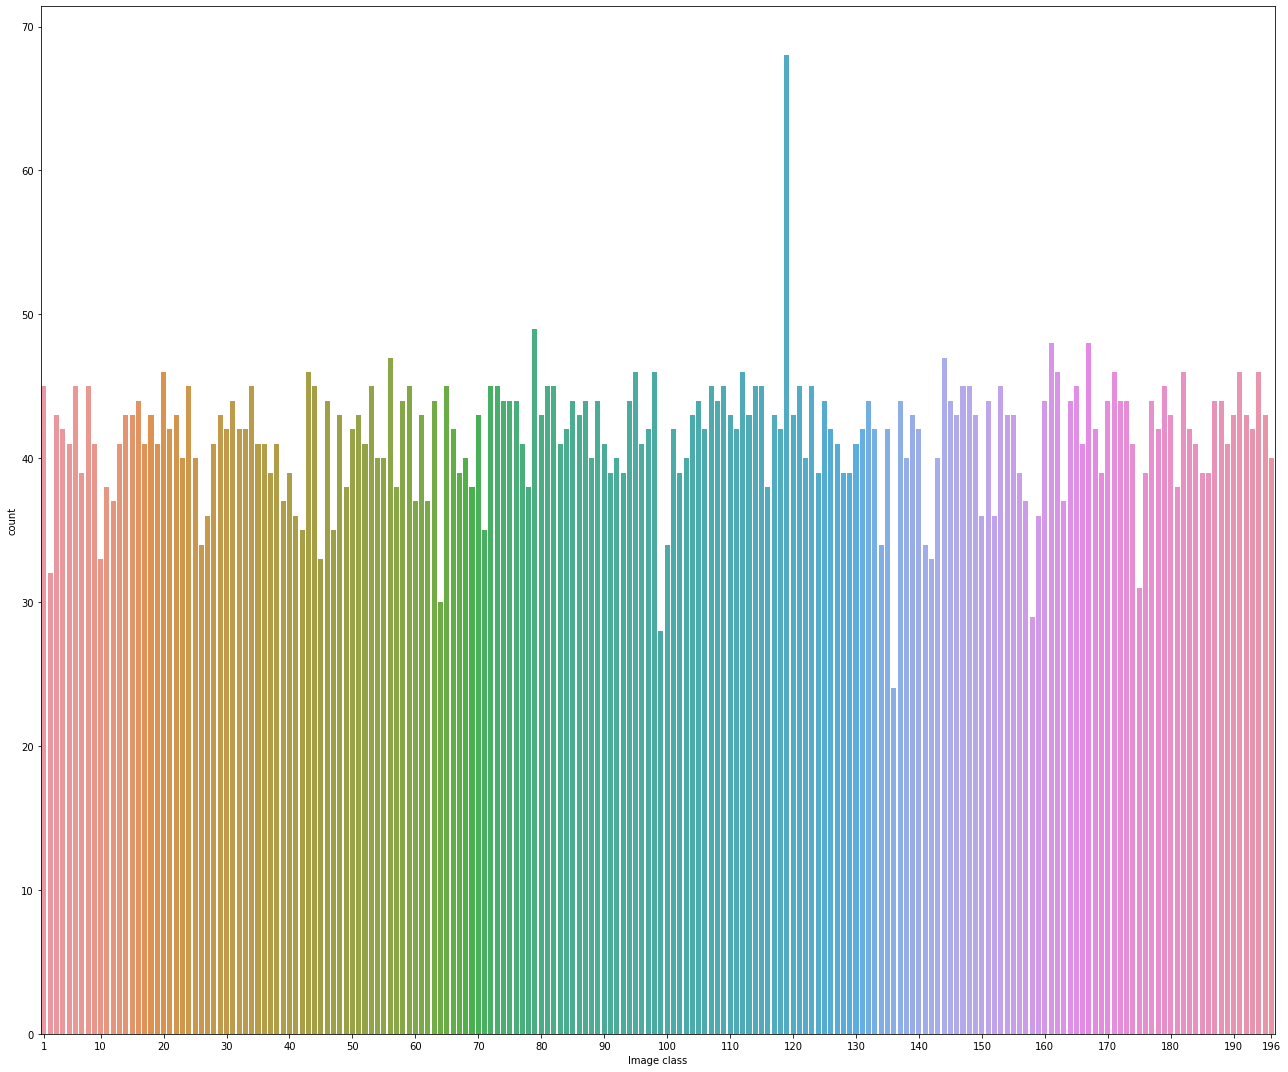

In [13]:
#%matplotlib inline
plt.subplots(figsize=(18,15))
ax = sns.countplot(data = car_annotations_train, x = car_annotations_train['Image class'] )
ax.set_xticks([0, 9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,195] )
ax.set_xticklabels([1, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,196])
plt.tight_layout()
plt.show()

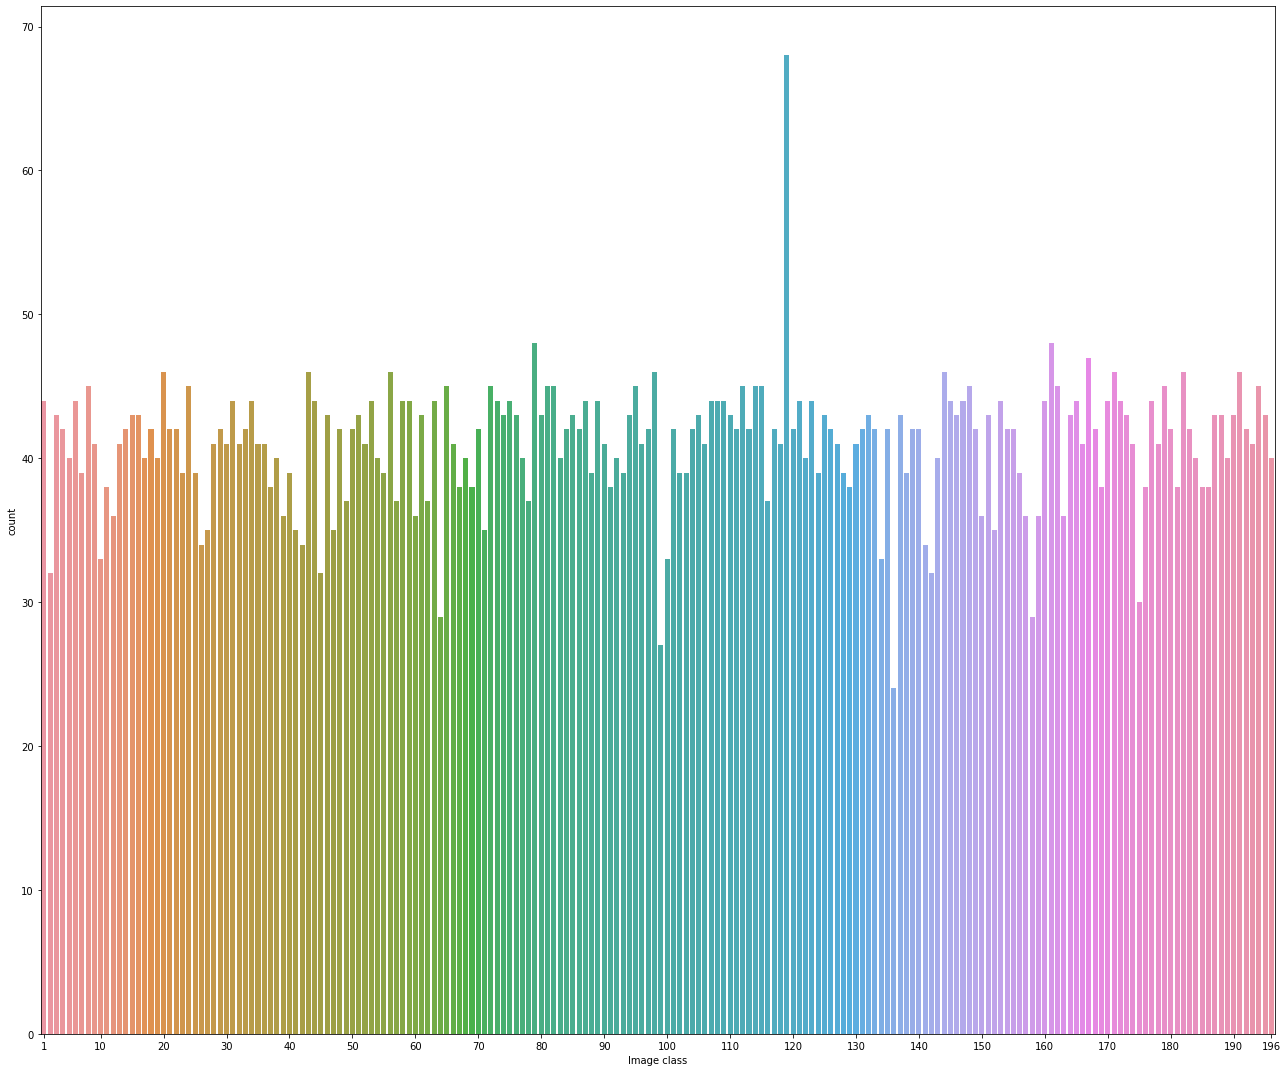

In [14]:
plt.subplots(figsize=(18,15))
ax = sns.countplot(data = car_annotations_test, x = car_annotations_test['Image class'] )
ax.set_xticks([0, 9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,195] )
ax.set_xticklabels([1, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,196])
plt.tight_layout()
plt.show()

In [15]:
os.listdir()

['CV2.ipynb',
 '.DS_Store',
 'Car-names.csv',
 'Annotations',
 '.ipynb_checkpoints',
 'Car-Images']

In [16]:
def load_image_paths_and_map_class(car_makes, dir_path, df_annotations):
  data = []
  for car_make in car_makes:
    img_path =  dir_path + car_make
    if os.path.exists(img_path):
      for img in os.listdir(img_path):
        data.append([img, img_path + "/" +img, df_annotations[df_annotations["Image Name"]==img]["Image class"].values[0]])
  return pd.DataFrame(data, columns=["Image Name", "FullPath", "Image Class"])

In [17]:
train_images_path = load_image_paths_and_map_class(car_makes_df.car_make.values, TRAIN_IMAGES_DIR_PATH, car_annotations_train)
test_images_path = load_image_paths_and_map_class(car_makes_df.car_make.values, TEST_IMAGES_DIR_PATH, car_annotations_test)

In [18]:
print("Total Training Images:", len(train_images_path))
print("Total Testing Images:", len(test_images_path))

Total Training Images: 8103
Total Testing Images: 8000


In [19]:
train_images_path.head()

Image Name                                           FullPath  Image Class
0  00522.jpg  Car-Images/Train/AM General Hummer SUV 2000/00...            1
1  03943.jpg  Car-Images/Train/AM General Hummer SUV 2000/03...            1
2  01832.jpg  Car-Images/Train/AM General Hummer SUV 2000/01...            1
3  01952.jpg  Car-Images/Train/AM General Hummer SUV 2000/01...            1
4  02848.jpg  Car-Images/Train/AM General Hummer SUV 2000/02...            1

In [20]:
print("Image path:", train_images_path.iloc[0,1])
print("Image shape:", cv2.imread(train_images_path.iloc[0,1]).shape)

Image path: Car-Images/Train/AM General Hummer SUV 2000/00522.jpg
Image shape: (71, 94, 3)


In [21]:
def plot_random_cars(car_makes, images_path, is_export=False):
  export_paths = {}
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(5):
        df = images_path[images_path["Image Class"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(5, 5, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          plt.imshow(imread(df.iloc[idx].FullPath))
      if is_export:
        p = str(imageClass) + "_class.png"
        plt.savefig(p)
        export_paths[car_makes.iloc[imageClass].values[0]] = p
      plt.show()
  return export_paths

In [22]:
car_makes_df.head()

car_make
0  AM General Hummer SUV 2000
1         Acura RL Sedan 2012
2         Acura TL Sedan 2012
3        Acura TL Type-S 2008
4        Acura TSX Sedan 2012

Buick Verano Sedan 2012


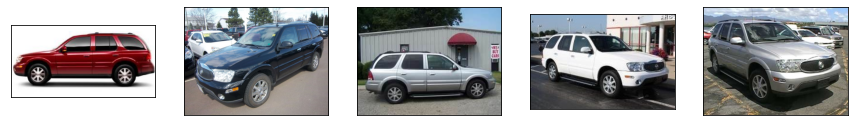

Ford Fiesta Sedan 2012


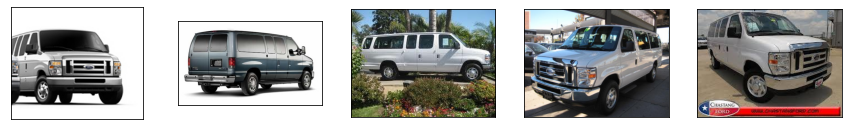

Nissan NV Passenger Van 2012


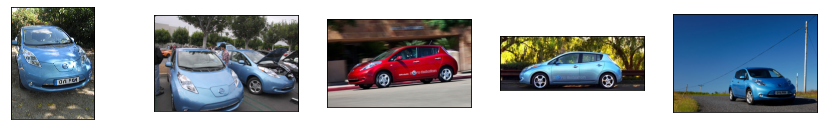

Geo Metro Convertible 1993


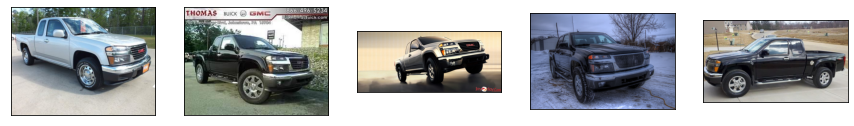

Honda Accord Coupe 2012


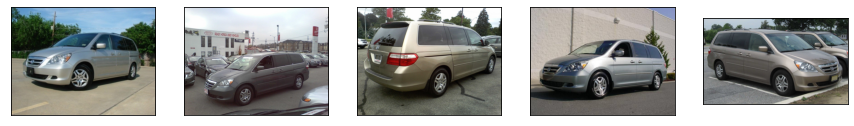

{}

In [23]:
plot_random_cars(car_makes_df, train_images_path)

Hyundai Azera Sedan 2012


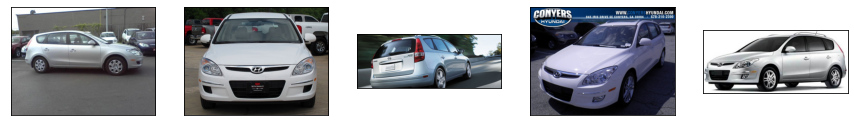

Audi V8 Sedan 1994


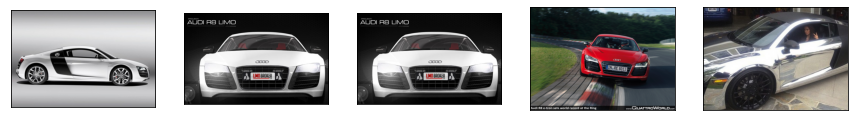

Chrysler PT Cruiser Convertible 2008


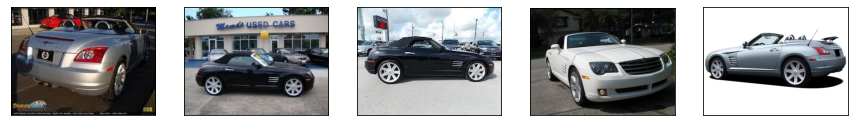

Chrysler 300 SRT-8 2010


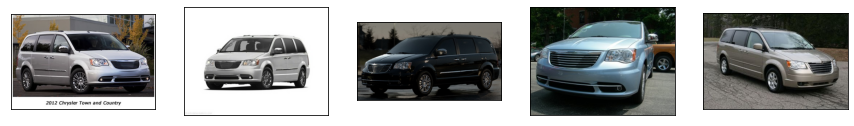

Hyundai Veracruz SUV 2012


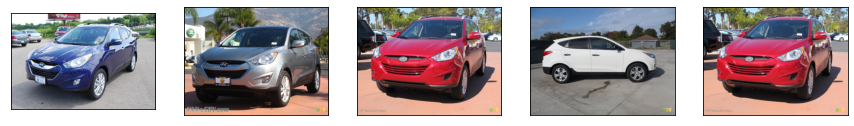

{}

In [24]:
plot_random_cars(car_makes_df, test_images_path)

In [27]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import glob

In [28]:
augmented_img = []
labels = []

for imgfolder in os.listdir(TRAIN_IMAGES_DIR_PATH):
  imgpath = TRAIN_IMAGES_DIR_PATH + imgfolder
  for img in glob.glob(imgpath + '/' + '*.jpg'):
    image = imageio.imread(img, pilmode="RGB")
    resize_image = iaa.Resize(224)
    image = resize_image.augment_image(image)
    augmented_img.append(image) ### image resized to 224 and appended ## actual image 
    labels.append(imgfolder) ### label appended
    
    #rotation 10
    rotate=iaa.Affine(rotate=(10))
    rotated_image=rotate.augment_image(image)
    augmented_img.append(rotated_image)
    labels.append(imgfolder)

    #rotation 20
    rotate=iaa.Affine(rotate=(20))
    rotated_image=rotate.augment_image(image)
    augmented_img.append(rotated_image)
    labels.append(imgfolder)

    #rotation 40
#     rotate=iaa.Affine(rotate=(40))
#     rotated_image=rotate.augment_image(image)
#     augmented_img.append(rotated_image)
#     labels.append(imgfolder)
    
    #Add gaussian_noise
    gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
    noise_image=gaussian_noise.augment_image(image)
    augmented_img.append(noise_image)
    labels.append(imgfolder)

    gaussian_noise=iaa.AdditiveGaussianNoise(20,30)
    noise_image=gaussian_noise.augment_image(image)
    augmented_img.append(noise_image)
    labels.append(imgfolder)

#     gaussian_noise=iaa.AdditiveGaussianNoise(30,40)
#     noise_image=gaussian_noise.augment_image(image)
#     augmented_img.append(noise_image)
#     labels.append(imgfolder)
    
    #Crop images
    crop = iaa.Crop(percent=(0.1)) # crop image
    crop_image=crop.augment_image(image)
    augmented_img.append(crop_image)
    labels.append(imgfolder)

    #shear
    shear = iaa.Affine(shear=(20,30))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    shear = iaa.Affine(shear=(0,10))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    shear = iaa.Affine(shear=(10,20))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    #flip_hr=iaa.Flipud(p=1.0)
    #flip_hr_image= flip_hr.augment_image(image)
    #augmented_img.append(flip_hr_image)
    #labels.append(imgfolder)
    
    #Contrast
    contrast=iaa.GammaContrast(gamma=2.0)
    contrast_image =contrast.augment_image(image)
    augmented_img.append(contrast_image)
    labels.append(imgfolder)

    #Scale images
    scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
    scale_image =scale_im.augment_image(image)
    augmented_img.append(scale_image)
    labels.append(imgfolder)

/var/folders/b6/ryf5z7sj707bhc_8q_jkk7q00000gn/T/ipykernel_3477/978375278.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(img, pilmode="RGB")


In [29]:
augmented_img_test = []
labels_test = []

for imgfolder in os.listdir(TEST_IMAGES_DIR_PATH):
  imgpath = TEST_IMAGES_DIR_PATH + imgfolder
  for img in glob.glob(imgpath + '/' + '*.jpg'):
    image = imageio.imread(img,pilmode="RGB")
    resize_image = iaa.Resize(224)
    image = resize_image.augment_image(image)
    augmented_img_test.append(image)
    labels_test.append(imgfolder)

/var/folders/b6/ryf5z7sj707bhc_8q_jkk7q00000gn/T/ipykernel_3477/3694155021.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(img,pilmode="RGB")


In [30]:
## Convert to numpy array

augmented_img_test = np.array(augmented_img_test)
labels_test = np.array(labels_test)

augmented_img = np.array(augmented_img)
labels = np.array(labels)

In [31]:
## Apply label encoder on labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(labels)
labels_enc = le.transform(labels)

le = LabelEncoder()

le.fit(labels_test)
labels_test_enc = le.transform(labels_test)

In [32]:
augmented_img[0].shape,augmented_img[24].shape, np.array(augmented_img).shape, len(labels)

((224, 224, 3), (224, 224, 3), (89584, 224, 224, 3), 89584)

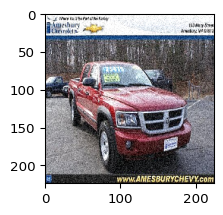

In [33]:
ia.imshow(augmented_img[3])

In [34]:
pd.DataFrame(labels_enc).value_counts()

119    748
75     539
160    528
166    528
143    517
      ... 
175    341
59     330
157    319
98     308
129    264
Length: 196, dtype: int64

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout

In [36]:
def plot_random_cars_with_bounding_box(car_makes, images_path, annotations, is_export=False):
  export_paths = {}
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(3):
        df = images_path[images_path["Image Class"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(3, 3, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          img = imread(df.iloc[idx].FullPath)
          ann = annotations[annotations["Image Name"] == df.iloc[idx]["Image Name"]]
          x1,y1,x2,y2 = ann['Bounding Box coordinates'].values[0], ann['Unnamed: 2'].values[0], ann['Unnamed: 3'].values[0], ann['Unnamed: 4'].values[0]
          cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2) # add rectangle to image
          plt.imshow(img)
      if is_export:
        p = str(imageClass) + "_bb.png"
        plt.savefig(p)
        export_paths[car_makes.iloc[imageClass].values[0]] = p
      plt.show()
  return export_paths

BMW X6 SUV 2012


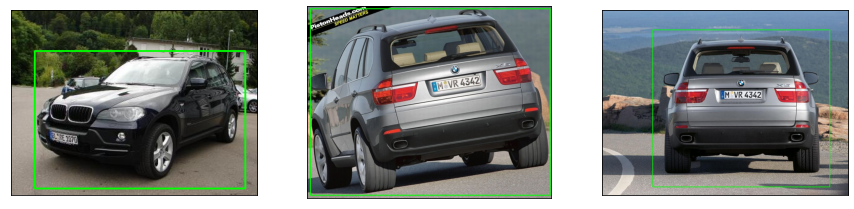

Cadillac Escalade EXT Crew Cab 2007


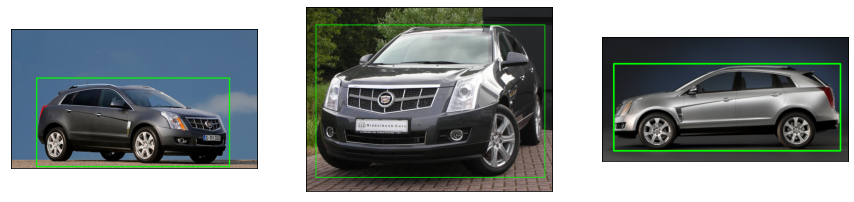

Spyker C8 Convertible 2009


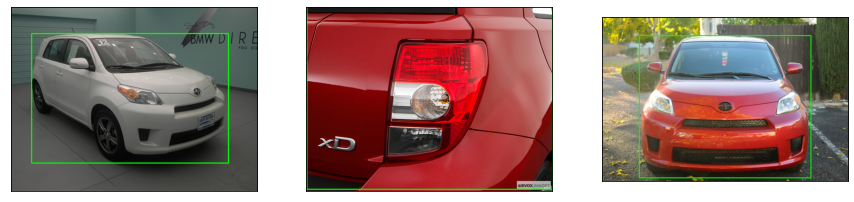

BMW 1 Series Convertible 2012


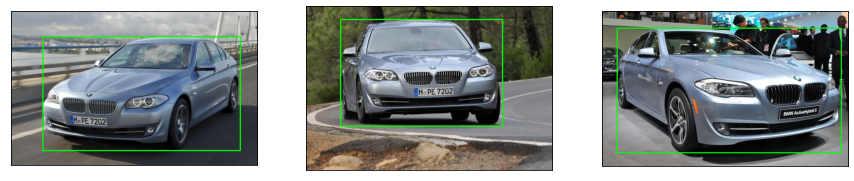

Buick Enclave SUV 2012


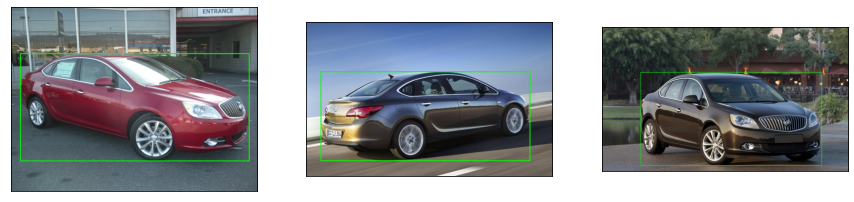

{}

In [37]:
plot_random_cars_with_bounding_box(car_makes_df, train_images_path, car_annotations_train)

Dodge Durango SUV 2007


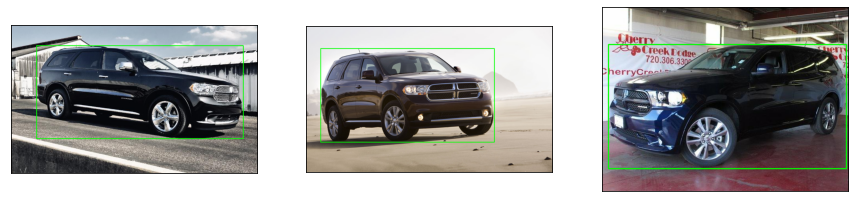

Hyundai Santa Fe SUV 2012


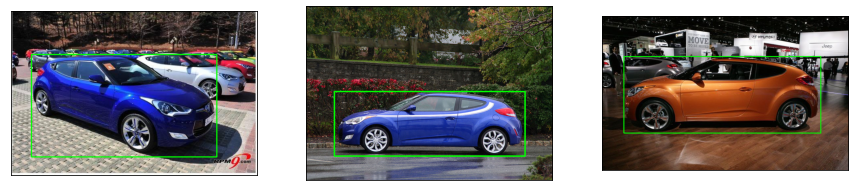

Buick Regal GS 2012


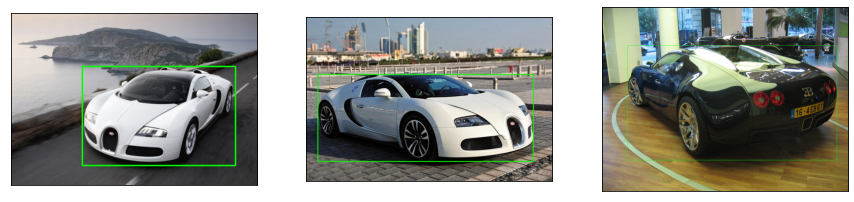

Dodge Ram Pickup 3500 Crew Cab 2010


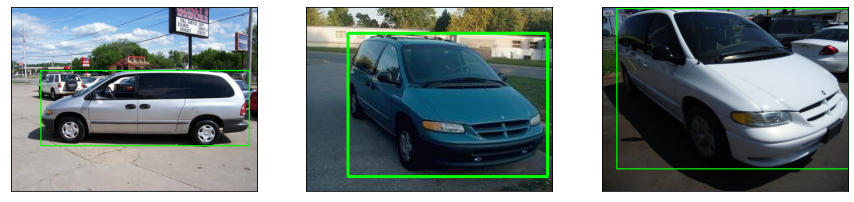

Dodge Durango SUV 2012


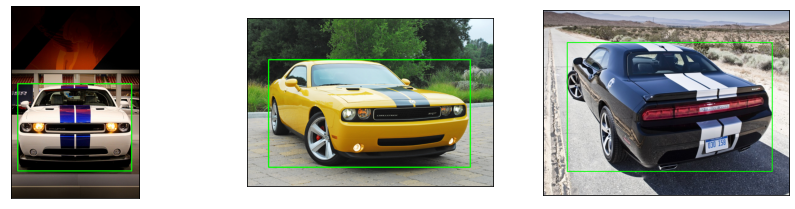

{}

In [38]:
plot_random_cars_with_bounding_box(car_makes_df, test_images_path,car_annotations_test)

### #Milestone 2